<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/Arvore_de_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de Desão: Classificação

In [ ]:
# Pacotes de Preparação de Dados

import pandas as pd
import numpy as np

# Pacotes Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem Estatistica

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Módulo Análise Exploratória - Análise I.V (Information Value)
import aed

In [ ]:
# Impostação da base de dados

df = pd.read_csv('base_rh.csv')

In [ ]:
# Primeiras 5 linhas

df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [ ]:
# Ultimas 5 linhas

df.tail()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
1465,Não,Viaja frequentemente,Ensino Técnico,Casado,Não,Muito bom,36,5
1466,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,39,7
1467,Não,Viaja raramente,Ensino Superior,Casado,Sim,Muito bom,27,6
1468,Não,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,49,9
1469,Não,Viaja raramente,Ensino Superior,Casado,Não,Excelente,34,4


In [ ]:
# Informações do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


In [ ]:
# Qt Linhas e colunas

df.shape

(1470, 8)

In [ ]:
# Verificando Duplicadas

df.duplicated().sum()

np.int64(33)

In [ ]:
# Descrição do DF

df.describe().round()

,Idade,Tempo_de_empresa
count,1470.0,1470.0
mean,37.0,7.0
std,9.0,6.0
min,18.0,0.0
25%,30.0,3.0
50%,36.0,5.0
75%,43.0,9.0
max,60.0,40.0


In [ ]:
# Descrição com object

df.describe(include=object).round()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida
count,1470,1470,1470,1470,1470,1470
unique,2,3,5,3,2,4
top,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom
freq,1233,1043,572,673,1054,893


In [ ]:
# Verificando missing values

df.isnull().sum()

,0
Funcionario_Deixou_Empresa,0
Freq_Viagens,0
Formacao,0
Estado_Civil,0
Faz_hora_extras,0
Equilibrio_de_Vida,0
Idade,0
Tempo_de_empresa,0


In [ ]:
# Alterando nome das colunas

colunas = ['funcionario_deixou_empresa', 'freq_viagens', 'formacao',
       'estado_civil', 'faz_hora_extras', 'equilibrio_de_vida', 'idade',
       'tempo_de_empresa']

df.columns = colunas

In [ ]:
# Ter uma idea dos funcionarios que saiu

df.query("funcionario_deixou_empresa == 'Sim' ")

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
14,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Muito bom,28,4
21,Sim,Viaja raramente,Mestrado,Solteiro,Não,Muito bom,36,5
24,Sim,Viaja raramente,Ensino Médio,Solteiro,Não,Muito bom,34,4
...,...,...,...,...,...,...,...,...
1438,Sim,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,23,1
1442,Sim,Viaja raramente,Mestrado,Casado,Sim,Excelente,29,2
1444,Sim,Viaja raramente,Ensino Técnico,Casado,Não,Ruim,56,10
1452,Sim,Viaja frequentemente,Mestrado,Divorciado,Não,Muito bom,50,6


In [ ]:
# Casamento pode ser uma motivo de deixar

df.query("funcionario_deixou_empresa == 'Sim' and estado_civil == 'Casado'")

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
33,Sim,Viaja raramente,Ensino Superior,Casado,Não,Excelente,39,1
34,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Bom,24,2
36,Sim,Viaja raramente,Ensino Técnico,Casado,Sim,Muito bom,50,3
45,Sim,Viaja raramente,Ensino Superior,Casado,Não,Muito bom,41,22
69,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Bom,36,1
...,...,...,...,...,...,...,...,...
1379,Sim,Viaja frequentemente,Ensino Superior,Casado,Não,Muito bom,27,1
1395,Sim,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,31,10
1438,Sim,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,23,1
1442,Sim,Viaja raramente,Mestrado,Casado,Sim,Excelente,29,2


In [ ]:
# Fazer horas estras pode ser outro motivo para sair

df.query("funcionario_deixou_empresa == 'Sim' and faz_hora_extras == 'Sim'")

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
14,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Muito bom,28,4
26,Sim,Viaja frequentemente,Ensino Médio,Solteiro,Sim,Muito bom,32,10
34,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Bom,24,2
...,...,...,...,...,...,...,...,...
1375,Sim,Viaja frequentemente,Ensino Técnico,Solteiro,Sim,Muito bom,32,4
1395,Sim,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,31,10
1396,Sim,Viaja raramente,Mestrado,Solteiro,Sim,Bom,53,2
1442,Sim,Viaja raramente,Mestrado,Casado,Sim,Excelente,29,2


In [ ]:
# EqVida pode ser o principal motivo da sua saida

df.query("funcionario_deixou_empresa == 'Sim' and equilibrio_de_vida == 'Ruim'")

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
234,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Ruim,33,5
239,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Ruim,32,3
264,Sim,Viaja raramente,Mestrado,Solteiro,Não,Ruim,28,0
286,Sim,Viaja frequentemente,Ensino Superior,Divorciado,Sim,Ruim,44,1
463,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Ruim,26,1
482,Sim,Viaja raramente,Mestrado,Divorciado,Não,Ruim,31,3
656,Sim,Viaja raramente,Mestrado,Solteiro,Sim,Ruim,32,1
669,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Ruim,39,2
695,Sim,Viaja raramente,Mestrado,Casado,Não,Ruim,37,14


In [ ]:
df.query("funcionario_deixou_empresa == 'Sim' and faz_hora_extras == 'Sim' and equilibrio_de_vida == 'Ruim'")

,funcionario_deixou_empresa,freq_viagens,formacao,estado_civil,faz_hora_extras,equilibrio_de_vida,idade,tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
234,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Ruim,33,5
239,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Ruim,32,3
286,Sim,Viaja frequentemente,Ensino Superior,Divorciado,Sim,Ruim,44,1
463,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Ruim,26,1
656,Sim,Viaja raramente,Mestrado,Solteiro,Sim,Ruim,32,1
669,Sim,Viaja raramente,Ensino Superior,Casado,Sim,Ruim,39,2
725,Sim,Viaja raramente,Mestrado,Divorciado,Sim,Ruim,35,4
1036,Sim,Viaja frequentemente,Ensino Superior,Casado,Sim,Ruim,31,2
1171,Sim,Viaja raramente,Ensino Superior,Solteiro,Sim,Ruim,40,4


In [ ]:
df_fun = df.groupby('formacao')['funcionario_deixou_empresa'].count().sort_values(ascending=False)

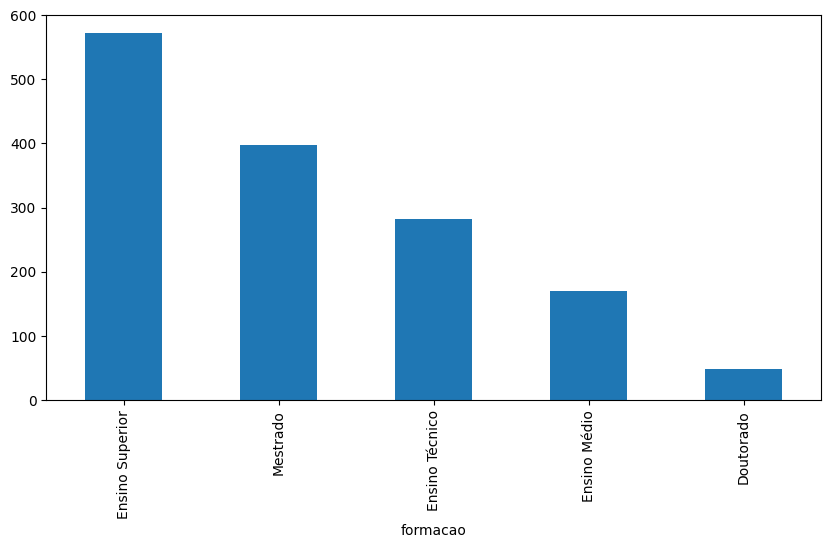

In [ ]:
df_fun.plot(kind='bar',figsize=(10,5));

In [ ]:
df_eq = df.groupby('equilibrio_de_vida')['funcionario_deixou_empresa'].count().sort_values(ascending=True)

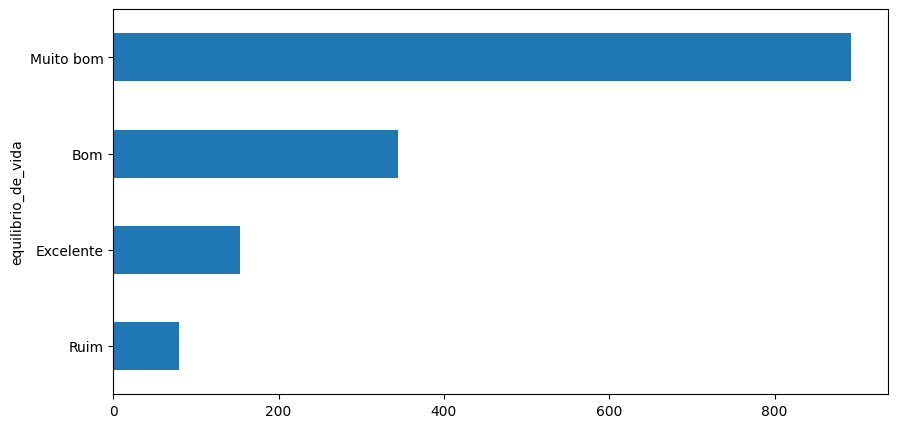

In [ ]:
df_eq.plot(kind='barh',figsize=(10,5));

In [ ]:
df_vi = df.groupby('freq_viagens')['funcionario_deixou_empresa'].count()

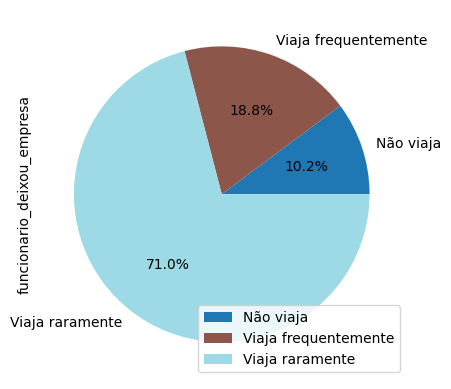

In [ ]:
df_vi.plot.pie(autopct='%1.1f%%', cmap='tab20', legend=True);

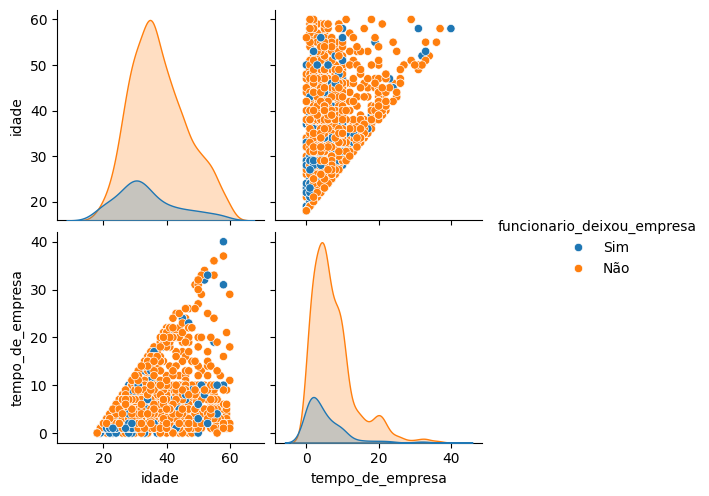

In [ ]:
sns.pairplot(df, hue='funcionario_deixou_empresa')

In [ ]:
# Information Value

df['target'] = np.where(df['funcionario_deixou_empresa'] == 'Sim', 1, 0)

In [ ]:
df_rh = aed.analise_iv(df, 'target')
df_rh.get_lista_iv()

/content/aed.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',


target,IV
Variavel,
funcionario_deixou_empresa,9.21
faz_hora_extras,0.40
tempo_de_empresa,0.34
idade,0.31
estado_civil,0.22
freq_viagens,0.13
equilibrio_de_vida,0.06
formacao,0.01


In [ ]:
# Criação das variáveis dummies

df_rh_mod = pd.get_dummies(df)
df_rh_mod.head()

,idade,tempo_de_empresa,target,funcionario_deixou_empresa_Não,funcionario_deixou_empresa_Sim,freq_viagens_Não viaja,freq_viagens_Viaja frequentemente,freq_viagens_Viaja raramente,formacao_Doutorado,formacao_Ensino Médio,...,formacao_Mestrado,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Solteiro,faz_hora_extras_Não,faz_hora_extras_Sim,equilibrio_de_vida_Bom,equilibrio_de_vida_Excelente,equilibrio_de_vida_Muito bom,equilibrio_de_vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
# Target (Variável Resposta/Dependente)

y = df_rh_mod['target']

# Features (Variavel Explicativa/Independentes)

x = df_rh_mod.drop(['target',
                    'funcionario_deixou_empresa_Não',
                    'funcionario_deixou_empresa_Sim'],
                   axis=1)

In [ ]:
# Ajuste do Modelo

modelo = DecisionTreeClassifier(max_depth=3,random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Avaliação do Modelo Treinado

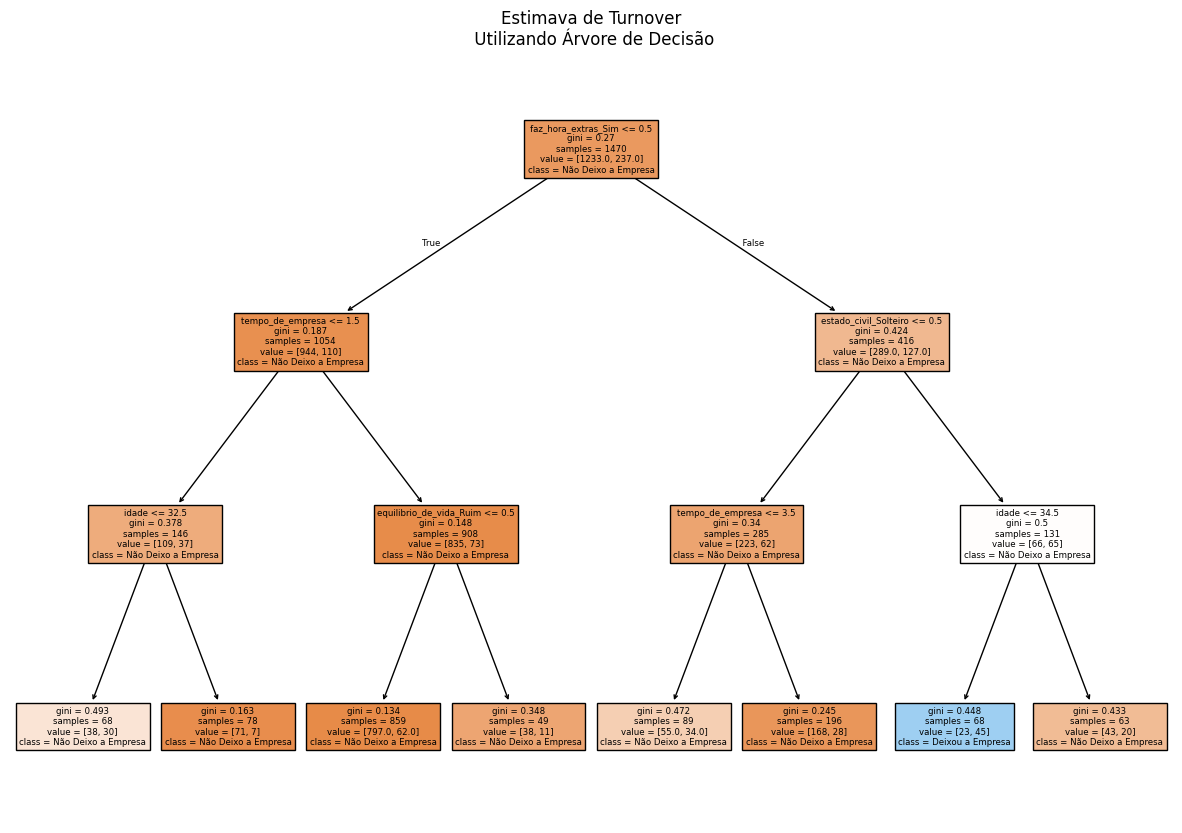

In [ ]:
# Interpretação do Modelo

plt.figure(figsize=(15,10))
tree.plot_tree(modelo,
               feature_names=x.columns,
               class_names=['Não Deixo a Empresa','Deixou a Empresa'],
               filled=True);
plt.title('Estimava de Turnover\n Utilizando Árvore de Decisão');

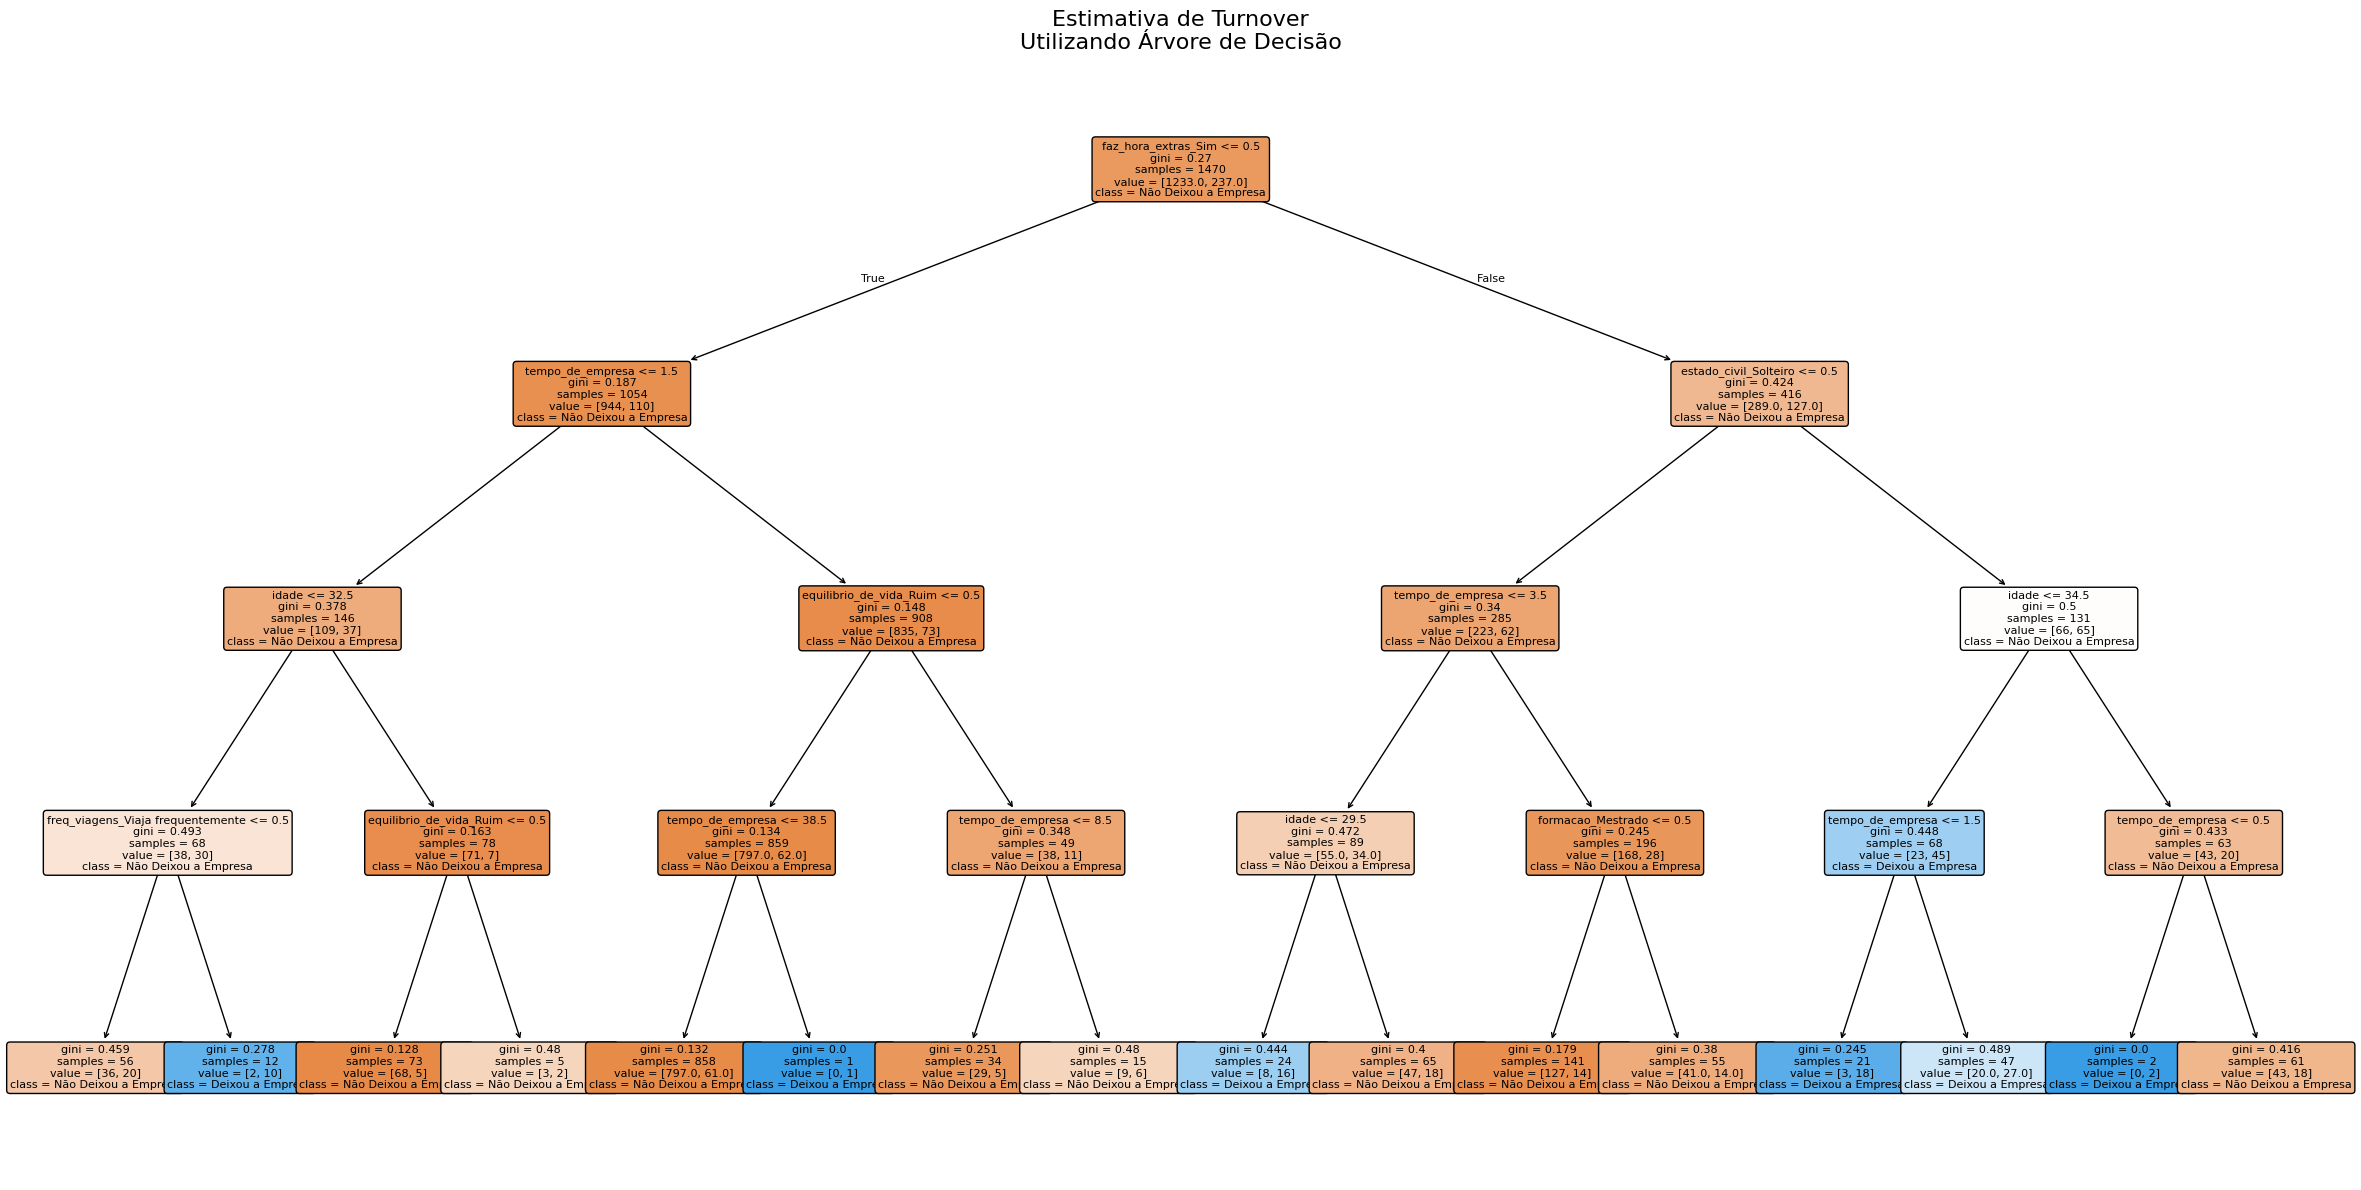

In [ ]:
plt.figure(figsize=(24, 12))  # Aumenta o tamanho da figura para melhor visualização

tree.plot_tree(
    modelo,
    feature_names=x.columns,
    class_names=['Não Deixou a Empresa', 'Deixou a Empresa'],
    filled=True,              # Preenche os nós com cor
    rounded=True,             # Deixa os cantos arredondados
    fontsize=8               # Aumenta o tamanho da fonte
)

plt.title('Estimativa de Turnover\nUtilizando Árvore de Decisão', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Desempenho do Modelo: Acurácia --------------- Matriz de confução

accuracy_score(y, modelo.predict(x))

0.8666666666666667